In [10]:
# %run pylib/fermi_sources

# def load_data(fgl='dr4'):
#     """Extract subset of 4FGL information relevant to ML pulsar-like selection
#     """
#     cols = 'glat glon significance r95 variability class1'.split()
#     fgl = Fermi4FGL(fgl)
#     # remove soruces without variability
#     df = fgl.loc[:,cols][fgl.variability>0].copy()

#     # df['class1'] = fgl.class1.apply(lambda x: 'unid' if x=='' else x)
#     df['lp_spec'] = [fgl.get_specfunc(name, 'LP') for name in df.index]
#     sed = df['lp_spec']
#     df['Ep'] = 10**sed.apply(lambda f: f.epeak)
#     df['Fp'] = 10**sed.apply(lambda f: f.fpeak)
#     df['d'] = sed.apply(lambda f: f.curvature()).clip(-0.1,2)

#     # reclassify associations
#     def reclassify(class1):
#         cl = class1.lower()
#         if cl in 'bll fsrq bcu unk spp unid'.split():
#             return cl
#         if cl in 'psr msp'.split(): return 'psr'
#         if cl=='': return 'unid'
#         return 'other'
#     df['association'] = df.class1.apply(reclassify);
#     return df
# with capture_hide('Setup info') as setup_output:
#     df = load_data()
#     print('DataFrame info')
#     df.info()
#     print()
#     print(df.groupby('association').size())
# show(setup_output)

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f1d4cfb3310>

In [ ]:
# %run pylib/ml_fitter

# df['log_var'] = np.log10(df.variability.clip(0.1,None))
# df['log_epeak'] = np.log10(df.Ep)
# df['log_fpeak'] = np.log10(df.Fp)

# self = MLfitter(df)
# print(self)
# X,y = self.getXy()

In [18]:
# self = FermiSources()
# show(self.setup_output)

<ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f1d487943a0>

In [1]:
%run pylib/machine_learning dark
self = ML(title='Machine Learning -- 4FGL-DR4 model',  model='fgl'  )
show(self.setup_output)

# Machine Learning -- 4FGL-DR4 model

<h5 style="text-align:right; margin-right:15px"> 2023-10-26 17:32</h5>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8afd45b190>

### Confusion analysis, test size = 25.0 %
* Model: SVC(C=1, gamma=2, probability=True)<br>
* Features: ['log_var', 'fgl_d', 'fgl_log_fpeak', 'fgl_log_epeak']<br>
Accuracy: 88%

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8ae3e15030>
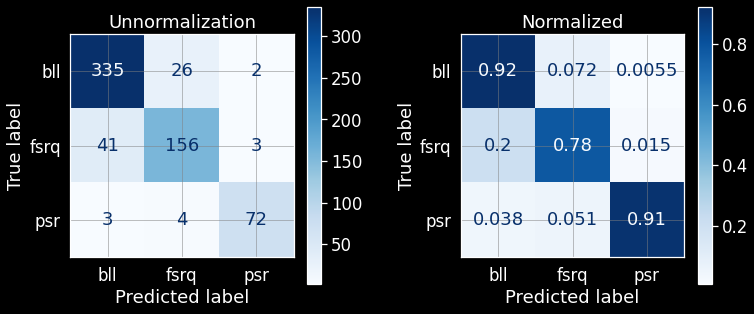

In [14]:
self.df['association'] = self.df.apply(lambda row: row.association if row.class1!='unk' else 'unk', axis=1)
self.df['association'] = self.df.apply(lambda row: row.association if row.class1!='spp' else 'spp', axis=1)
self.train_predict(show_confusion=True)

### Predicted pulsar probabilities
This show the predicted pulsar probaility for the Unid set, for each prediction.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8ac7683d90>
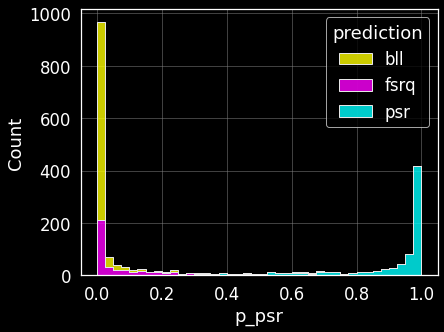

In [42]:

pp = self.predict_prob()
show(f"""### Predicted pulsar probabilities
This show the predicted pulsar probaility for the Unid set, for each prediction.
""") 
pp['prediction'] = self.df.prediction
show(
    sns.histplot(pp, x='p_psr', element='step',bins=np.arange(0,1.01,0.025), multiple='stack',
                 hue = 'prediction',
                 hue_order=('bll', 'fsrq', 'psr'),
                 palette=['yellow', 'magenta', 'cyan'],
                 edgecolor= '0.9',
                 alpha=0.8,                 
                 ).figure
);

In [4]:
show("""### TRAPUM check
The following sources, taken from a list compiled by Elizabeth, were found to be pulsars. """)
trapum_found=['4FGL J0131.7-5346', '4FGL J0739.6-4530', '4FGL J0749.8-4420',
       '4FGL J0836.6-6036', '4FGL J1208.0-6900', '4FGL J1544.2-2554',
       '4FGL J1603.3-6010', '4FGL J1639.0-2727', '4FGL J1830.7-2414',
       '4FGL J2056.4-5922']
u = pp.loc[trapum_found]
show(u)


### TRAPUM check
The following sources, taken from a list compiled by Elizabeth, were found to be pulsars. 

,p_bll,p_fsrq,p_psr,prediction
name,,,,
4FGL J0131.7-5346,0.284003,0.316606,0.399391,psr
4FGL J0739.6-4530,0.261419,0.421446,0.317135,fsrq
4FGL J0749.8-4420,0.040888,0.075416,0.883696,psr
4FGL J0836.6-6036,0.908102,0.087301,0.004597,bll
4FGL J1208.0-6900,0.000832,0.001933,0.997235,psr
4FGL J1544.2-2554,0.006892,0.004930,0.988178,psr
4FGL J1603.3-6010,0.003066,0.001055,0.995879,psr
4FGL J1639.0-2727,0.529558,0.463570,0.006871,bll
4FGL J1830.7-2414,0.001284,0.006860,0.991856,psr


## Predictions
        

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8ac8accca0>
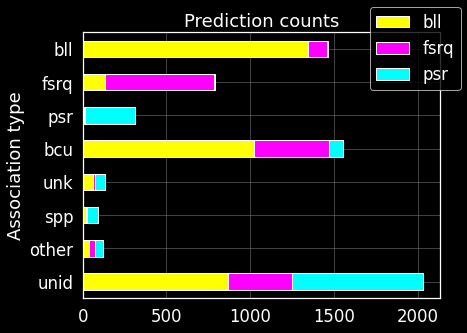

Notes:
* The target is the UNIDs, but applied to all
* BCUs mostly blazars, a check
* BLL, FSRQ, Pulsar look OK (a little redundant), a check

In [16]:

self.show_prediction_association() 

# Curvature vs. Peak energy

## 4FGL-DR4 model

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8ae3f3f880>
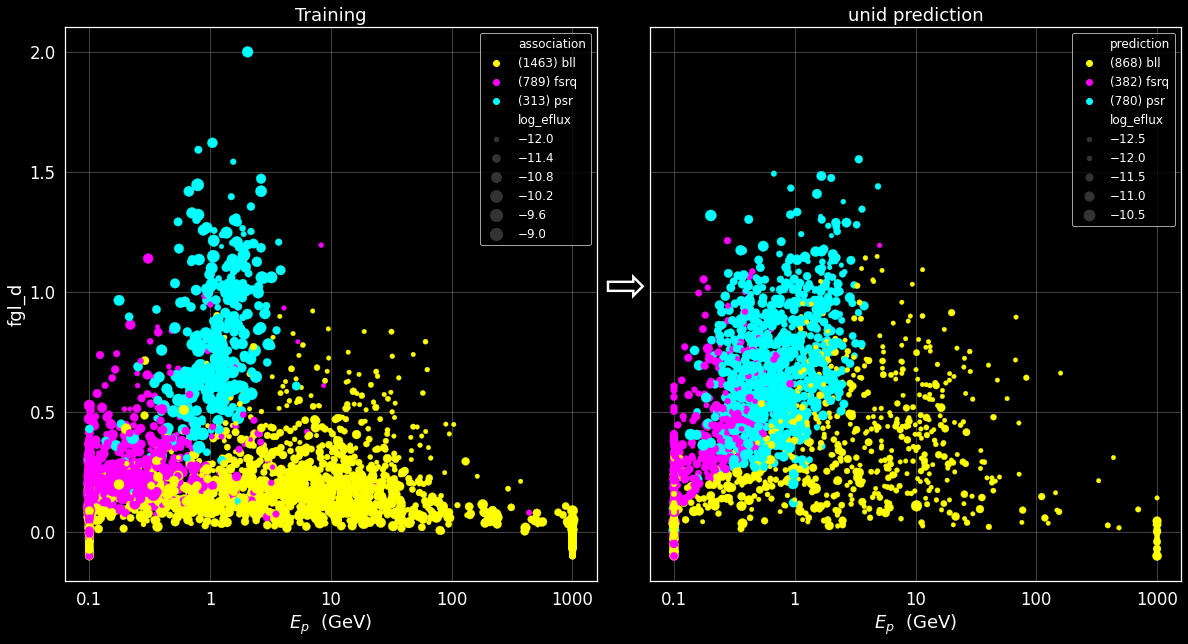

## UW model

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8ae3bc0670>
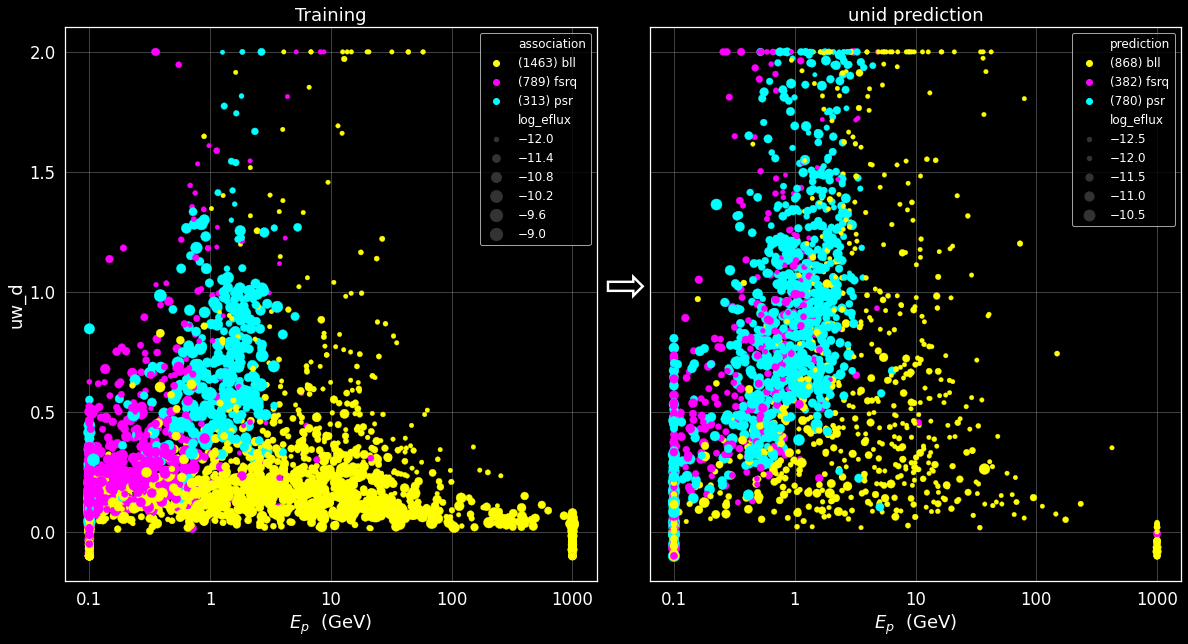

In [6]:
show('# Curvature vs. Peak energy')
show('## 4FGL-DR4 model')
self.scatter_train_predict( x='fgl_log_epeak', y='fgl_d', **epeak_kw('x')) # caption="Curvature vs. Ep with 4FGL model", fignum=101,));
show('## UW model')
self.scatter_train_predict( x='uw_log_epeak', y='uw_d',**epeak_kw('x'))# caption="Curvature vs. Ep with UW model", fignum=100, );

In [7]:
df=self.df
df.query('prediction=="psr"').groupby('association').size()

association
bcu       86
bll        5
fsrq       5
other    116
psr      297
unid     780
unk       60
dtype: int64

In [8]:
sdf = self.reformat()
sdf.groupby('source type').size()

* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_v07_hpx.fits`<br>  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$<br>  select energy= 893 MeV

source type
BIN-psr        1
GC-psr         1
HMB-psr        4
MSP          174
NOV-psr        1
UNID-BLL     868
UNID-FSRQ    382
UNID-PSR     780
bcu-psr       85
bin-psr        5
bll-psr        5
fsrq-psr       5
gal-psr        1
glc           33
hmb-psr        1
lmb-psr        4
pwn-psr        2
rdg-psr        1
sfr-psr        1
snr-psr        8
spp-psr       64
unk-psr       60
young        139
dtype: int64

In [9]:
sdf['log_Epeak']=np.log10(sdf.Ep).clip(-1,1);
sdf['log_Fpeak']=np.log10(sdf.Fp);

## Compare the spp parameters with pulsars 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8ae3a856f0>
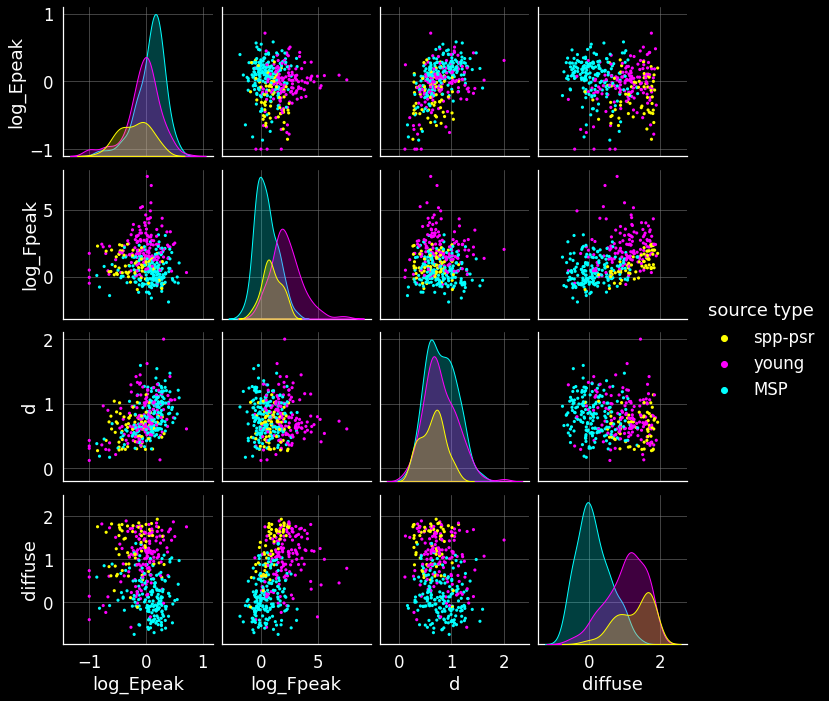

In [10]:
pp = sns.pairplot(sdf, vars='log_Epeak log_Fpeak d diffuse'.split(),
             hue='source type', hue_order='spp-psr young MSP'.split(),
         palette=self.palette[:3], plot_kws=dict(edgecolor='none', s=10) )
show(f"""## Compare the spp parameters with pulsars """)
show(pp.figure)

In [11]:
show(f"""### Add diffuse flux to sources and add to summary  """)
from pylib.diffuse import *
diff = Diffuse()
sdf['diffuse'] = diff.get_values_at(sdf)
df['diffuse'] = diff.get_values_at(df)

### Add diffuse flux to sources and add to summary  

* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_v07_hpx.fits`<br>  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$<br>  select energy= 893 MeV

## Diffuse flux value at sources 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8ae3f6be50>
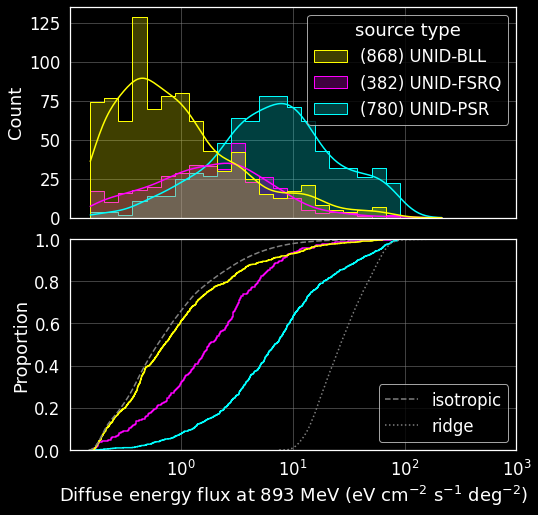

In [12]:
diff.show_diffuse_flux( sdf, hue_kw=dict(hue='source type', hue_order='UNID-BLL UNID-FSRQ UNID-PSR'.split(), palette=self.palette ))

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f8ae3c0ca60>
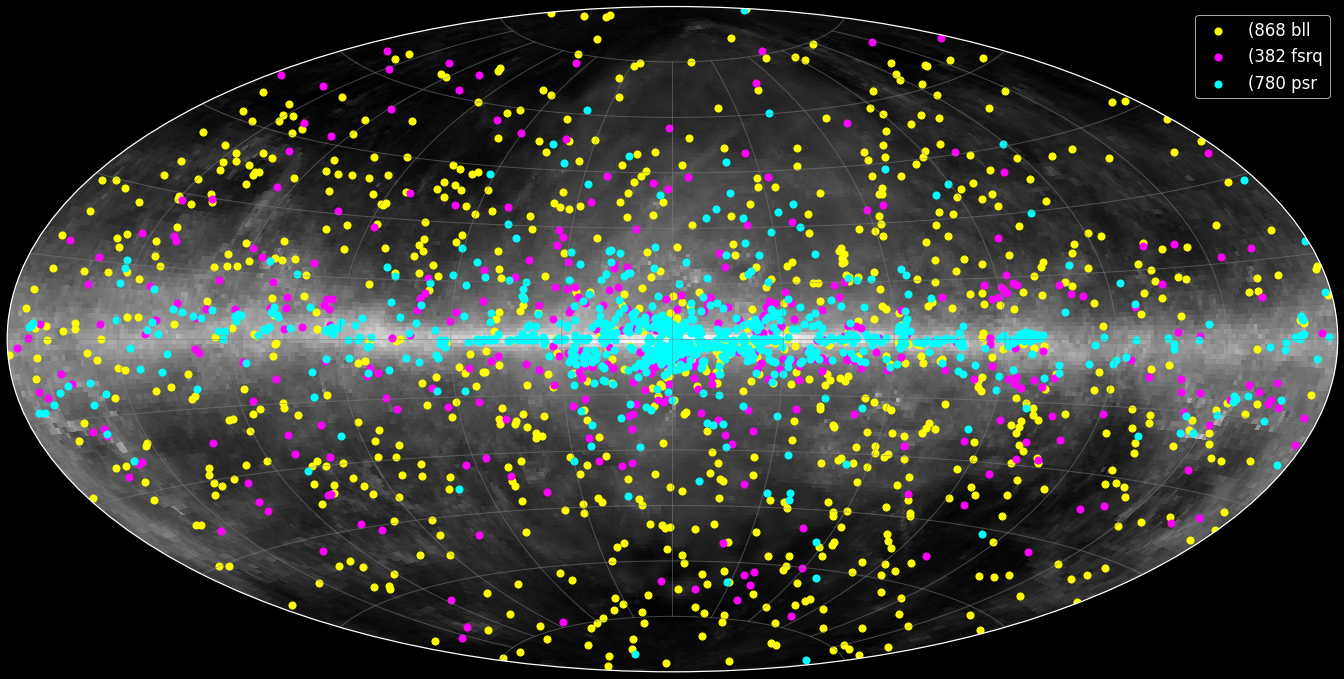

In [13]:
ax = diff.ait_plot()
for pred, color in zip('bll fsrq psr'.split(), self.palette):
    dfs = df.query(f'association=="unid" & prediction=="{pred}"')
    ax.scatter(dfs, s=50, label=f'({len(dfs)} {pred}', color=color )
    ax.legend()
show(ax.figure)